In [1]:
import pandas as pd
import numpy as np
import regex as re

import warnings
warnings.filterwarnings('ignore') 

import pylab as plt
import seaborn as sns
import matplotlib as plt

In [2]:
sharkis= pd.read_csv('../data/shark_attack.csv', encoding='latin1')

shark=sharkis.copy()

shark.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,Unnamed:22,Unnamed:23
0,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swiming,Anonymous,M,15,...,0,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,0,0
1,1883-1889,0,Unprovoked,PANAMA,0,"Panama Bay 8ÂºN, 79ÂºW",Others,jules patterson,M,0,...,0,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,0,0
2,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swiming,coast guard personnel,M,0,...,0,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,0,0
3,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,0,Dive,ahmun,M,0,...,0,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,0,0
4,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Dive,Anonymous,M,0,...,0,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,0,0


In [3]:
#OBEJTIVO: 

#Los objetivos principales eran conocer los lugares donde mas ataques hay, actividades que pueden influir y mortalidad.
#La mortalidad esta relacionada con el sexo, hay mayor supervivenvia?
#¿En que luegar se producen mas ataques ?


#1º) Lugares:

porcem=shark.Country.value_counts(normalize=True)*100

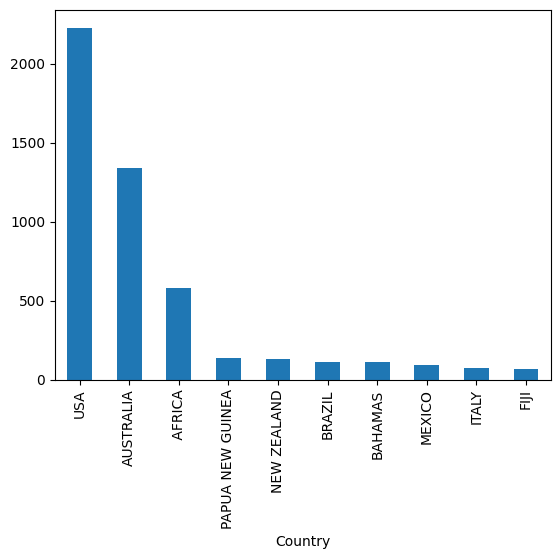

In [4]:
shark.Country.value_counts().head(10).plot.bar();

In [5]:
# El 35.36% de lo ataques se producieron en USA, seguida del 21% en AUSTRALIA.

In [6]:
shark.Activity.value_counts(normalize=True)*100

Activity
Others                                24.674706
Swiming                               21.183751
Board activities(surf,kite,etc...)    19.565217
Fishing                               18.597271
Dive                                   8.060933
Shallow water activities               2.554745
Interaction with sharks                2.237385
Boat activities                        1.586798
Wreck                                  0.777531
Rowing                                 0.523643
Jumping                                0.238020
Name: proportion, dtype: float64

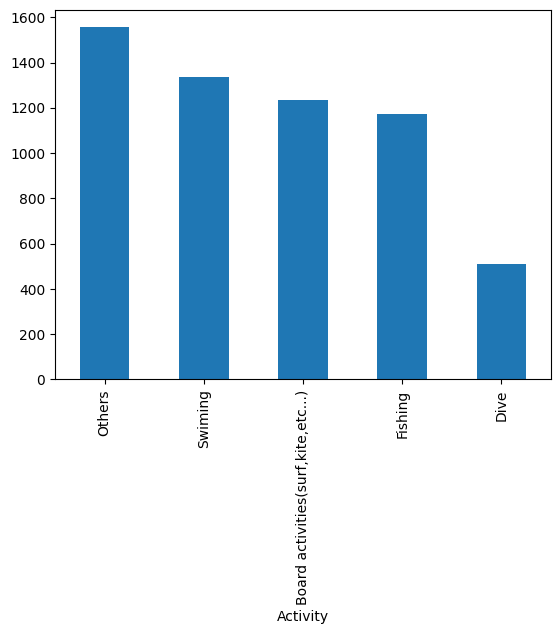

In [7]:
shark.Activity.value_counts().head(5).plot.bar();

In [8]:
#Este es el top 5 de las actividades que se realizaban cuando se producio el ataque.

In [9]:
shark.Fatality.value_counts(normalize=True)*100

Fatality
Still alive    68.248175
Fatality       22.040622
Unknown         9.711203
Name: proportion, dtype: float64

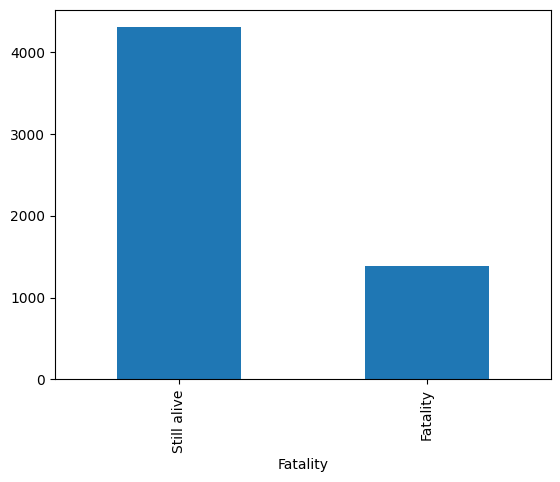

In [10]:
shark.Fatality.value_counts().head(2).plot.bar();

In [11]:
# El 68% de los ataques que se produjeron no fueron mortales 

In [12]:
actividades_fatales = shark[shark['Fatality'] == 'Fatality']
porcentaje_actividades_fatales = actividades_fatales['Activity'].value_counts(normalize=True) * 100

porcentaje_actividades_fatales

Activity
Swiming                               35.925126
Others                                25.197984
Fishing                               11.735061
Board activities(surf,kite,etc...)    10.007199
Dive                                   8.351332
Boat activities                        3.167747
Wreck                                  2.447804
Shallow water activities               1.799856
Interaction with sharks                0.935925
Jumping                                0.287977
Rowing                                 0.143988
Name: proportion, dtype: float64

In [13]:
# El 35 % de los ataques durante 'Swiming'fueron fatales , el resto tiene un porcentaje bajo por lo que deducimos que al tiburon si no estas dentro del agua
# no les apetece ir a buscarte, depende del hambre que tenga 🦈🦈🦈

In [14]:
shark.Sex.value_counts(normalize=True)*100

Sex
M         80.879086
F         10.107902
Unkown     9.013012
Name: proportion, dtype: float64

In [15]:
super = shark[shark['Fatality'] == 'Still alive']
Supervivencia = super['Sex'].value_counts(normalize=True) * 100
Supervivencia

Sex
M         80.981167
F         10.881190
Unkown     8.137642
Name: proportion, dtype: float64

In [16]:
#😯😯😯 El 81& de los hombres sobreviven a ataques de tiburon pero solo el 11% de las mujeres sobreviven